# CSC 310 Final Project: Crop Yield Prediction App

Group Members: Ryan Jensen, Timothy Hourihan


## Our Dataset

https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?select=yield_df.csv

The dataset contains the crop yield of a specific crop in multiple countries given the country's average rain, temperature, and pesticide use. Our set came from Kaggle Datasets (Link provided above). Our dataset has 7 attributes of importance that we will be working with.

Area: Name of country (string)

Item: Specific crop planted (string)

Year: Time that the crop was planted (int)

average_rain_fall_mm_per_year: Average rain fall per year (float)

pesticides_tonnes: Amount of pesticides used for crops in tonnes (float)

avg_temp: Average temperature (float)

TARGET:

hg/ha_yield - Area yield of a specific crop given the average rain, temperature, and pesticide use in a specific country (int)

## Data Preprocessing

#### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px
# from google.colab import drive # Uncomment if you are running in a Google Colab.

### Reading the Dataset

In [2]:
# Uncomment below if you are running in Google Colab. You should have the dataset stored on your drive. (Note: You can't run Gradio in Google Colab)
# drive.mount('/content/drive')
# df=pd.read_csv("/content/drive/MyDrive/yield_df.csv")

# The following code is if you are running this locally.
df = pd.read_csv("data/yield_df.csv" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [3]:
df.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


#### Removing the unnamed column

In [4]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


The Unnamed column has no importance to us, so we're deleting it to make our dataset look cleaner.

#### Changing column names to fit our project

In [5]:
df = df.rename(columns = {"Area":"country"})
df = df.rename(columns = {"Item":"crop"})
df = df.rename(columns = {"Year":"year"})
df.head(10)

,country,crop,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


We decided that having all of our columns in lowercase will prevent confusion. Also, we specified what Area and Item is, since every area is just a country and every item is a crop

In [6]:
df.isna().sum(axis=0)

country                          0
crop                             0
year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

This is checking for null values in our dataset to see if we need to fill in any boxes. This shows that there isn't any, so we can proceed.

### Top 10 Countries with Highest Yield

In [7]:
df.groupby(['country'],sort=True)['hg/ha_yield'].sum().nlargest(10)

country
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

India and Brazil has far and beyond the highest yield, so it's important to note their average temperatures, rainfall, and pesticide use.

In [8]:
df_india = df[df['country'] == 'India']
df_india.head(10)
df_india.describe()

,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,4048.000000,4048.000000,4048.0,4048.000000,4048.000000
mean,2001.434783,80884.467391,1083.0,48459.040000,26.012589
std,7.064719,95950.224381,0.0,14997.351972,0.909861
min,1990.000000,6553.000000,1083.0,14485.330000,23.260000
25%,1995.000000,13704.750000,1083.0,37423.000000,25.460000
50%,2001.000000,28124.000000,1083.0,46195.000000,25.980000
75%,2008.000000,112471.000000,1083.0,61257.000000,26.670000
max,2013.000000,385818.000000,1083.0,75000.000000,28.850000


India has an average of 1083 mm rainfall, 48459 tonnes of pesticide, and a 26 degree celsius temperature to produce the highest yield by a large margin.

In [9]:
df_india = df[df['country'] == 'Brazil']
df_india.head(10)
df_india.describe()

,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,2277.000000,2277.000000,2277.0,2277.000000,2277.000000
mean,2001.434783,73583.797101,1761.0,189736.869565,22.673913
std,7.065398,62134.430897,0.0,108835.427440,3.504673
min,1990.000000,11540.000000,1761.0,49695.000000,17.570000
25%,1995.000000,23100.000000,1761.0,92967.220000,19.150000
50%,2001.000000,38798.000000,1761.0,145552.000000,21.910000
75%,2008.000000,117588.000000,1761.0,312637.000000,25.950000
max,2013.000000,277517.000000,1761.0,367778.000000,28.760000


Brazil has an average of 1761 mm rainfall, 189736 tonnes of pesticide, and a 22.7 degree celsius temperature to produce the second highest yield.

### Histograms

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'hg/ha_yield'}>],
       [<Axes: title={'center': 'average_rain_fall_mm_per_year'}>,
        <Axes: title={'center': 'pesticides_tonnes'}>],
       [<Axes: title={'center': 'avg_temp'}>, <Axes: >]], dtype=object)

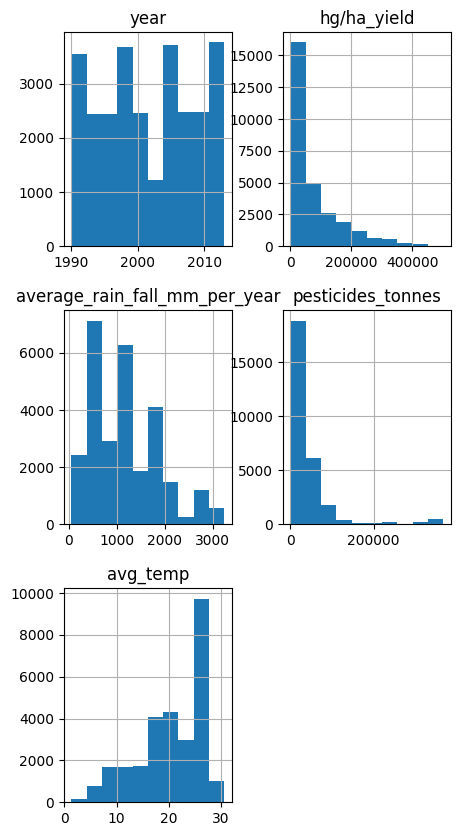

In [10]:
df.hist(figsize=(5,10))

The majority of pesticide usage according to the histograms is actually close to none. We know that India and Brazil use a lot of pesticide and have the two highest yields, so pesticide use is an important variable here.

The majority of rainfall seems to slow down after 2000mm, with most of the rainfall coming before 2000mm

Average temperature is around 25 degrees celsius

The overall yield is also close to none in most cases, which confirms the validity of the data set since conditions have to be perfect to have a good yield to harvest/sell.

### Scatter Matrix

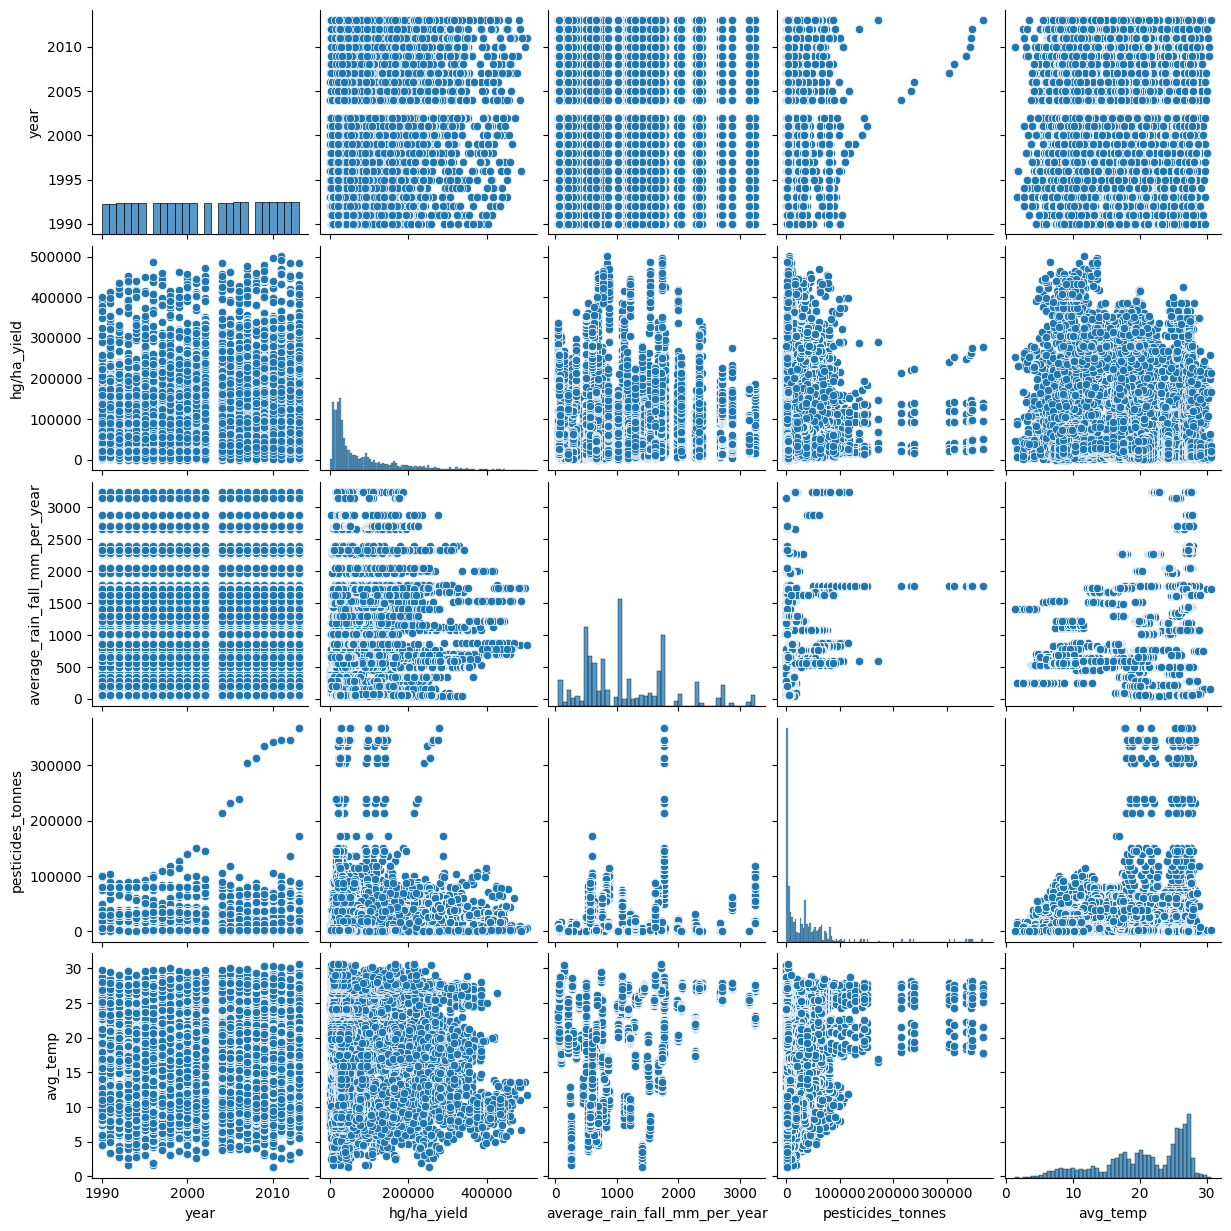

In [11]:
import seaborn as sns
sns.pairplot(df)

None of these scatter plots in the scatter matrix shows an incredibly strong correlation between any two column, so no deletion is required.

### Heat Map

Text(0.5, 1.0, 'Heatmap')

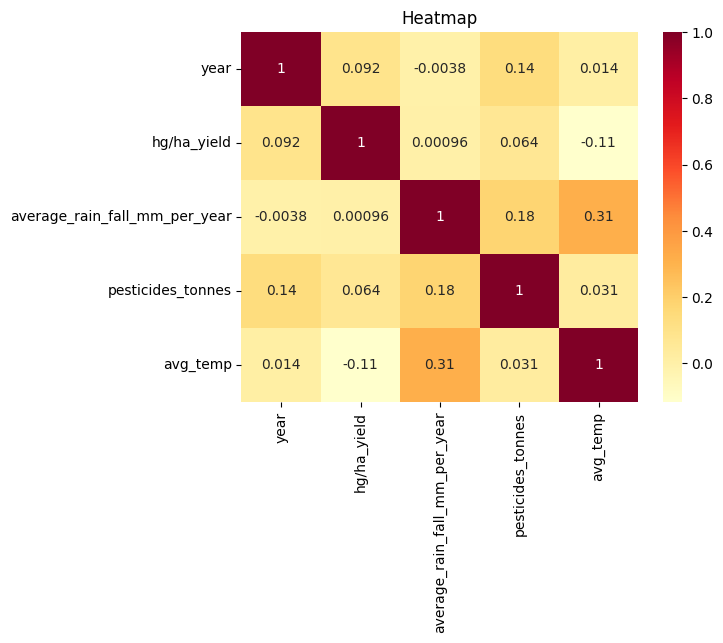

In [12]:
cor = df.select_dtypes(['int64','float64']).corr()
sns.heatmap(cor,cmap = 'YlOrRd',annot = True)
plt.title('Heatmap')

This heat map further shows that there isn't really a very strong correlation with any of the columns, so no deletion required.

While there isn't a strong correlation, we can see that average rain_fall and average_temp can affect eachother. This makes sense because countries with a lot of rain fall typically have slightly cooler climates and vice versa. However, they are not dependent on eachother so we have no need to alter any of the data.

## Building Model

#### Importing necessary libraries

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

#### Preparing the data for moedeling

In [14]:
# Separating dataset into features and target
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

# Encoding categorical data
label_encoders = {}
for column in ['country', 'crop']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

This code block is separating our dataset into features and target and then splitting the dataset for training all of our models to see which model is the best.

#### Training and evaluating models

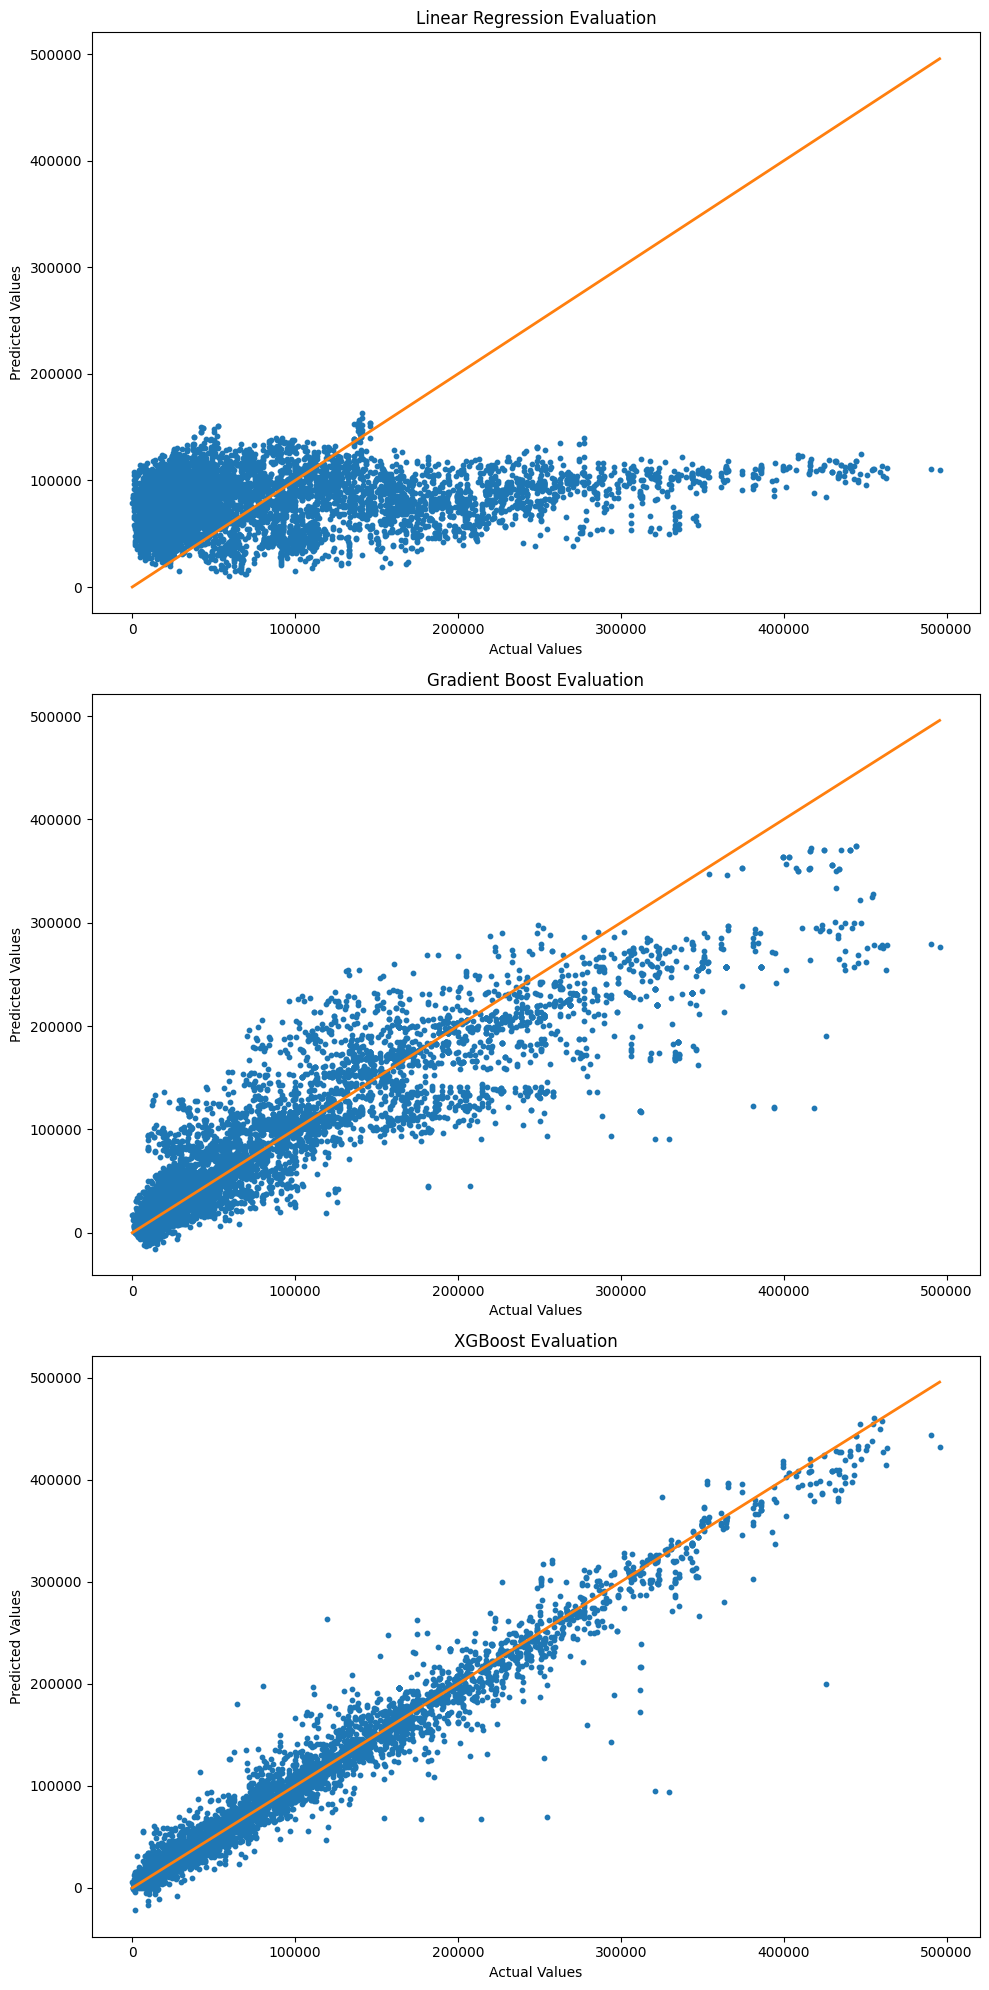

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.082337,6.658088e+09,0.082337
1,Gradient Boost,0.824986,1.269810e+09,0.824986
2,XGBoost,0.973156,1.947650e+08,0.973156


In [15]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)),
    ('XGBoost', XGBRegressor(random_state=1)),
]

results = []
fig, axs = plt.subplots(len(models), figsize=(10, 20))

for idx, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))

    # Plotting
    axs[idx].scatter(y_test, y_pred, s=10, color='#1f77b4')  # Blue color
    axs[idx].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#ff7f0e', linewidth=2)  # Orange color
    axs[idx].set_title(f'{name} Evaluation')
    axs[idx].set_xlabel('Actual Values')
    axs[idx].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Displaying results in a DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
display(df_results)


From this code block we can see that XGBoost is much more accurate than Gradient Boost and Linear Regression, so we will keep XGBoost in mind going forward.

#### KFold Validation

In [16]:
results = []

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boost": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1),
    "XGBoost": XGBRegressor(random_state=1),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=1)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))

    # KFold Validation
    kf = KFold(n_splits=5, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)
    mean_score = np.mean(scores)
    print(f"{name} - Mean CV Score: {mean_score}")


Linear Regression - Mean CV Score: 0.08161666049968508
Gradient Boost - Mean CV Score: 0.8289985087696502
XGBoost - Mean CV Score: 0.9748807122739658
KNN - Mean CV Score: 0.318940189542448
Decision Tree - Mean CV Score: 0.9771945746061752


Much like the accuracy check, XGBoost has one of the highest Mean CV Score. Both of these scores are above .97 so we decided to use XGBoost for our app model.

## Model Deployment with Gradio

#### What is Gradio?

Gradio is a python library that lets us easily create a user interface for things as complex like machine learning models, or things as simple as a python function. In this case, we're making a UI on a python function.

#### Defining a Predict Function

In [17]:
def predict_yield(crop_type, rainfall, country, pesticides, temperature):
    try:
        # Convert inputs to the correct data types
        rainfall = float(rainfall)
        pesticides = float(pesticides)
        temperature = float(temperature)

        # Apply the same LabelEncoder transformations as during model training
        encoded_crop = label_encoders['crop'].transform([crop_type])[0]
        encoded_country = label_encoders['country'].transform([country])[0]

        # Use a default year, 2000 is good
        default_year = 2000

        # Create a DataFrame for the input with the correct column order
        input_data = pd.DataFrame([[encoded_country, encoded_crop, default_year, rainfall, pesticides, temperature]],
                                  columns=['country', 'crop', 'year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'])

        # Make a prediction
        prediction = models["XGBoost"].predict(input_data)[0]

        prediction_with_units = f"{prediction:.2f} hg/ha"
        return prediction_with_units
    except Exception as e:
        print(f"Error in prediction: {e}")
        raise e


This is our prediction yield function that takes in the crop, rainfall, pesticide use, country, and average temperature and outputs a crop yield. We are using gradio to make a user interface of this function.

In [18]:
# Example test
test_prediction = predict_yield("Wheat", 100, "Ecuador", 20, 25)
print(test_prediction)


10602.49 hg/ha


This is an example output of our prediction function, we can see that it gives us a reasonable output.

#### Creating Gradio Interface

In [19]:
import gradio as gr


# Extracting unique values for 'country' and 'crop' columns so we can display them in the dropdown as options
unique_countries = df['country'].unique().tolist()
unique_crop_types = df['crop'].unique().tolist()

# Sorting lists
unique_countries.sort()
unique_crop_types.sort()

# Creating a Gradio interface for the crop yield prediction model.
iface = gr.Interface(
    fn=predict_yield,  # The function to predict crop yield based on user inputs.
    inputs=[
        gr.Dropdown(choices=unique_crop_types, label="Crop Type"),
        gr.Number(label="Rainfall (mm)"),
        gr.Dropdown(choices=unique_countries, label="Country"),
        gr.Number(label="Pesticides (tonnes)"),
        gr.Number(label="Average Temperature (°C)")
    ],
    outputs="text",
    title="Crop Yield Prediction",
    description="Select the parameters to predict the crop yield.",
    allow_flagging=False
)

# Launching the Gradio interface. This will open a web page where users can interact with the model.
iface.launch()


c:\Users\timot\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\timot\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\interface.py:275: UserWarning: The `allow_flagging` parameter in `Interface` nowtakes a string value ('auto', 'manual', or 'never'), not a boolean. Setting parameter to: 'never'.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


This block of code is us creating our gradio user interface. The gr.Interface function is used to construct the actual interface. We pass our predict_yield function as the primary functionality behind the interface. This function is expected to take inputs provided through the interface and return the predicted crop yield. The inputs include dropdown menus for selecting the crop type and country, and numeric fields for entering rainfall, pesticide usage, and average temperature, and reflect the parameters our model requires to make a prediction.

